In [128]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import plotly.graph_objects as go
import pandas as pd
import cv2
import matplotlib.image as mpimg
import os
from PIL import Image

In [280]:
# Read the data of the coin
coin_csv = "memedata/wifusdt.csv"
coin = pd.read_csv(coin_csv)

# Check the data
coin.head(5)

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,LogReturns
0,1711929600000,4.5773,4.6254,4.4941,4.5644,2509926.81,1711933199999,1.141050e+07,33213,1154093.23,5.252356e+06,0.000000
1,1711933200000,4.5650,4.6499,4.5382,4.5774,1654470.00,1711936799999,7.605741e+06,22466,900841.62,4.142921e+06,0.002844
2,1711936800000,4.5769,4.6000,4.4336,4.4786,2437210.57,1711940399999,1.096614e+07,31243,1208248.03,5.437820e+06,-0.021821
3,1711940400000,4.4787,4.5141,4.4444,4.4457,1936742.07,1711943999999,8.686821e+06,24498,1025743.72,4.601902e+06,-0.007373
4,1711944000000,4.4456,4.5076,4.4349,4.4851,1859596.24,1711947599999,8.307091e+06,24077,938646.87,4.193801e+06,0.008823


In [281]:
# Check the shape of the coin dataframe
print(coin.shape)

(5136, 12)


In [282]:
# 1704067200000 is Jan 1, 2024
# 1711929600000 is Apr 1, 2024

training_benchmark = 1704067200000
validation_benchmark = 1711929600000

training_data = coin[coin["Open time"] < training_benchmark]
validation_data = coin[(coin["Open time"] < validation_benchmark) & (coin["Open time"] >= training_benchmark)]
testing_data = coin[coin["Open time"] >= validation_benchmark]

# Print the shape of each data
print(training_data.shape)
print(validation_data.shape)
print(testing_data.shape)


(0, 12)
(0, 12)
(5136, 12)


In [283]:
# Delete unnecessary columns
training_data_important = training_data.drop(["Open time", "Close time", "Number of trades", "Taker buy base asset volume", 'Taker buy quote asset volume', "Quote asset volume", "Volume"], axis = 1)
validation_data_important = validation_data.drop(["Open time", "Close time", "Number of trades", "Taker buy base asset volume", 'Taker buy quote asset volume', "Quote asset volume", "Volume"], axis = 1)
testing_data_important = testing_data.drop(["Open time", "Close time", "Number of trades", "Taker buy base asset volume", 'Taker buy quote asset volume', "Quote asset volume", "Volume"], axis = 1)

# Check the shape
print(training_data_important.shape)
print(validation_data_important.shape)
print(testing_data_important.shape)

(0, 5)
(0, 5)
(5136, 5)


In [268]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
training_data_important[0:24]

,Open,High,Low,Close,LogReturns
0,0.21953,0.22235,0.21600,0.22162,0.000000
1,0.22160,0.22695,0.22112,0.22382,0.009878
2,0.22382,0.22495,0.22300,0.22361,-0.000939
3,0.22370,0.22901,0.22339,0.22730,0.016367
4,0.22730,0.25000,0.22640,0.23898,0.050109
5,0.23891,0.24187,0.23470,0.23819,-0.003311
6,0.23819,0.23903,0.23037,0.23428,-0.016552
7,0.23421,0.23430,0.22564,0.22976,-0.019482
8,0.22971,0.23195,0.22577,0.22874,-0.004449
9,0.22878,0.23781,0.22851,0.23259,0.016691


In [178]:
# FOR training_data_important

# Check if there is already an image folder
image_folder = "image" 
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# After that, create a folder for each coin inside image_folder
coin_folder = coin_csv.split('/')[-1].replace('.csv', '')
coin_folder_path = os.path.join(image_folder, coin_folder)

if not os.path.exists(coin_folder_path):
    os.makedirs(coin_folder_path)

# Create a folder for training data
training_folder = "training_folder" 
training_folder_path = os.path.join(coin_folder_path, training_folder)

if not os.path.exists(training_folder_path):
    os.makedirs(training_folder_path)

# Start to slice training_data_important
num_rows = len(training_data_important)

for start_index in range(0, num_rows - 25):
    # Find end_index
    end_index = start_index + 24

    # Slice data
    df_slice = training_data_important[start_index:end_index]
    df_slice["Date"] = pd.date_range(start = '2023-01-01', periods = 24, freq = 'H')
    # Create the figure
    fig = go.Figure()

    # Add the OHLC bar
    fig.add_trace(go.Ohlc(x = df_slice["Date"], open = df_slice["Open"],
                      high = df_slice["High"], low = df_slice["Low"],
                      close = df_slice["Close"], name = "OHLC",
                      yaxis = "y", increasing_line_color = "white", decreasing_line_color = "white", line=dict(width = 1)))
    
    fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis_rangeslider_visible = False,
    xaxis = {
    "showticklabels": False,
    "ticks": "",
    "type": "date",
    "gridcolor": "black"
    },
    yaxis = {
        # 'domain': [0.2, 1],
        'range': [min(df_slice["Low"].min(), df_slice["Open"].min(), 
                       df_slice["Close"].min()), 
                      max(df_slice["High"].max(), df_slice["Open"].max(), 
                        df_slice["Close"].max())],
        'visible': False,
        "gridcolor": "black"
    },
    # yaxis2 = dict(domain = [0, 0.2], visible = False),
    width = 72, # REMEMBER TO CHANGE TO 72
    height = 54.4, # REMEMBER TO CHANGE TO 54.4
    showlegend = False,
    margin = dict(l = 0, r = 0, t = 0, b = 0)
    )

    file_name = f"{start_index}_to_{end_index - 1}.jpeg"
    file_path = os.path.join(training_folder_path, file_name)

    # Export the image
    fig.write_image(file_path)

    # Load the image
    img = mpimg.imread(file_path)

    # Change it to grayscale image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Process new images
    processedImg = img > 48
    processedImg = processedImg.astype(np.uint8) * 255 

    # Export the image
    cv2.imwrite(file_path, processedImg)
    print(f"Current index: {start_index}")

Current index: 0
Current index: 1
Current index: 2
Current index: 3
Current index: 4
Current index: 5
Current index: 6
Current index: 7
Current index: 8
Current index: 9
Current index: 10
Current index: 11
Current index: 12
Current index: 13
Current index: 14
Current index: 15
Current index: 16
Current index: 17
Current index: 18
Current index: 19
Current index: 20
Current index: 21
Current index: 22
Current index: 23
Current index: 24
Current index: 25
Current index: 26
Current index: 27
Current index: 28
Current index: 29
Current index: 30
Current index: 31
Current index: 32
Current index: 33
Current index: 34
Current index: 35
Current index: 36
Current index: 37
Current index: 38
Current index: 39
Current index: 40
Current index: 41
Current index: 42
Current index: 43
Current index: 44
Current index: 45
Current index: 46
Current index: 47
Current index: 48
Current index: 49
Current index: 50
Current index: 51
Current index: 52
Current index: 53
Current index: 54
Current index: 55
Cu

In [179]:
# FOR validation_data_important

# Check if there is already an image folder
image_folder = "image" 
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# After that, create a folder for each coin inside image_folder
coin_folder = coin_csv.split('/')[-1].replace('.csv', '')
coin_folder_path = os.path.join(image_folder, coin_folder)

if not os.path.exists(coin_folder_path):
    os.makedirs(coin_folder_path)

# Create a folder for training data
validation_folder = "validation_folder" 
validation_folder_path = os.path.join(coin_folder_path, validation_folder)

if not os.path.exists(validation_folder_path):
    os.makedirs(validation_folder_path)

# Start to slice validation_data_important
num_rows = len(validation_data_important)

for start_index in range(0, num_rows - 25):
    # Find end_index
    end_index = start_index + 24

    # Slice data
    df_slice = validation_data_important[start_index:end_index]
    df_slice["Date"] = pd.date_range(start = '2023-01-01', periods = 24, freq = 'H')
    # Create the figure
    fig = go.Figure()

    # Add the OHLC bar
    fig.add_trace(go.Ohlc(x = df_slice["Date"], open = df_slice["Open"],
                      high = df_slice["High"], low = df_slice["Low"],
                      close = df_slice["Close"], name = "OHLC",
                      yaxis = "y", increasing_line_color = "white", decreasing_line_color = "white", line=dict(width = 1)))
    
    fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis_rangeslider_visible = False,
    xaxis = {
    "showticklabels": False,
    "ticks": "",
    "type": "date",
    "gridcolor": "black"
    },
    yaxis = {
        # 'domain': [0.2, 1],
        'range': [min(df_slice["Low"].min(), df_slice["Open"].min(), 
                       df_slice["Close"].min()), 
                      max(df_slice["High"].max(), df_slice["Open"].max(), 
                        df_slice["Close"].max())],
        'visible': False,
        "gridcolor": "black"
    },
    # yaxis2 = dict(domain = [0, 0.2], visible = False),
    width = 72, # REMEMBER TO CHANGE TO 72
    height = 54.4, # REMEMBER TO CHANGE TO 54.4
    showlegend = False,
    margin = dict(l = 0, r = 0, t = 0, b = 0)
    )

    file_name = f"{start_index}_to_{end_index - 1}.jpeg"
    file_path = os.path.join(validation_folder_path, file_name)

    # Export the image
    fig.write_image(file_path)

    # Load the image
    img = mpimg.imread(file_path)

    # Change it to grayscale image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Process new images
    processedImg = img > 48
    processedImg = processedImg.astype(np.uint8) * 255 

    # Export the image
    cv2.imwrite(file_path, processedImg)
    print(f"Current index: {start_index}")

Current index: 0
Current index: 1
Current index: 2
Current index: 3
Current index: 4
Current index: 5
Current index: 6
Current index: 7
Current index: 8
Current index: 9
Current index: 10
Current index: 11
Current index: 12
Current index: 13
Current index: 14
Current index: 15
Current index: 16
Current index: 17
Current index: 18
Current index: 19
Current index: 20
Current index: 21
Current index: 22
Current index: 23
Current index: 24
Current index: 25
Current index: 26
Current index: 27
Current index: 28
Current index: 29
Current index: 30
Current index: 31
Current index: 32
Current index: 33
Current index: 34
Current index: 35
Current index: 36
Current index: 37
Current index: 38
Current index: 39
Current index: 40
Current index: 41
Current index: 42
Current index: 43
Current index: 44
Current index: 45
Current index: 46
Current index: 47
Current index: 48
Current index: 49
Current index: 50
Current index: 51
Current index: 52
Current index: 53
Current index: 54
Current index: 55
Cu

In [284]:
# FOR testing_data_important

# Check if there is already an image folder
image_folder = "image" 
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# After that, create a folder for each coin inside image_folder
coin_folder = coin_csv.split('/')[-1].replace('.csv', '')
coin_folder_path = os.path.join(image_folder, coin_folder)

if not os.path.exists(coin_folder_path):
    os.makedirs(coin_folder_path)

# Create a folder for testing data
testing_folder = "testing_folder" 
testing_folder_path = os.path.join(coin_folder_path, testing_folder)

if not os.path.exists(testing_folder_path):
    os.makedirs(testing_folder_path)

# Start to slice testing_data_important
num_rows = len(testing_data_important)

for start_index in range(0, num_rows - 25):
    # Find end_index
    end_index = start_index + 24

    # Slice data
    df_slice = testing_data_important[start_index:end_index]
    df_slice["Date"] = pd.date_range(start = '2023-01-01', periods = 24, freq = 'H')
    # Create the figure
    fig = go.Figure()

    # Add the OHLC bar
    fig.add_trace(go.Ohlc(x = df_slice["Date"], open = df_slice["Open"],
                      high = df_slice["High"], low = df_slice["Low"],
                      close = df_slice["Close"], name = "OHLC",
                      yaxis = "y", increasing_line_color = "white", decreasing_line_color = "white", line=dict(width = 1)))
    
    fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis_rangeslider_visible = False,
    xaxis = {
    "showticklabels": False,
    "ticks": "",
    "type": "date",
    "gridcolor": "black"
    },
    yaxis = {
        # 'domain': [0.2, 1],
        'range': [min(df_slice["Low"].min(), df_slice["Open"].min(), 
                       df_slice["Close"].min()), 
                      max(df_slice["High"].max(), df_slice["Open"].max(), 
                        df_slice["Close"].max())],
        'visible': False,
        "gridcolor": "black"
    },
    # yaxis2 = dict(domain = [0, 0.2], visible = False),
    width = 72, # REMEMBER TO CHANGE TO 72
    height = 54.4, # REMEMBER TO CHANGE TO 54.4 - REAL HEIGHT IS 54
    showlegend = False,
    margin = dict(l = 0, r = 0, t = 0, b = 0)
    )

    file_name = f"{start_index}_to_{end_index - 1}.jpeg"
    file_path = os.path.join(testing_folder_path, file_name)

    # Export the image
    fig.write_image(file_path)

    # Load the image
    img = mpimg.imread(file_path)

    # Change it to grayscale image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Process new images
    processedImg = img > 48
    processedImg = processedImg.astype(np.uint8) * 255 

    # Export the image
    cv2.imwrite(file_path, processedImg)
    print(f"Current index: {start_index}")

Current index: 0
Current index: 1
Current index: 2
Current index: 3
Current index: 4
Current index: 5
Current index: 6
Current index: 7
Current index: 8
Current index: 9
Current index: 10
Current index: 11
Current index: 12
Current index: 13
Current index: 14
Current index: 15
Current index: 16
Current index: 17
Current index: 18
Current index: 19
Current index: 20
Current index: 21
Current index: 22
Current index: 23
Current index: 24
Current index: 25
Current index: 26
Current index: 27
Current index: 28
Current index: 29
Current index: 30
Current index: 31
Current index: 32
Current index: 33
Current index: 34
Current index: 35
Current index: 36
Current index: 37
Current index: 38
Current index: 39
Current index: 40
Current index: 41
Current index: 42
Current index: 43
Current index: 44
Current index: 45
Current index: 46
Current index: 47
Current index: 48
Current index: 49
Current index: 50
Current index: 51
Current index: 52
Current index: 53
Current index: 54
Current index: 55
Cu

In [181]:
# We write a function to convert the images folder to .dat type
def images_to_dat(images_folder, output_file):
    with open(output_file, "wb") as dat_file:
        for filename in sorted(
            [f for f in os.listdir(images_folder) if f != "output.csv" and f.endswith(".jpeg")],
            key=lambda x: int(x.split('_')[0])
        ):
            if filename.endswith(".jpeg"):
                # Read the image file
                img_path = os.path.join(images_folder, filename)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Failed to load {filename}")
                    continue 
                img = img > 48
                img = img.astype(np.uint8) * 255
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img_array = np.array(img)

                # Flatten the image and convert to bytes, for easier storage
                image_bytes = img_array.flatten().tobytes()

                # Write the image data and store that in .dat file
                dat_file.write(image_bytes)

In [4]:
for filename in sorted(
            [f for f in os.listdir("image/adausdt/training_folder/") if f != "output.csv" and f.endswith(".jpeg")],
            key=lambda x: int(x.split('_')[0])
        ):
        print(filename)
        

0_to_23.jpeg
1_to_24.jpeg
2_to_25.jpeg
3_to_26.jpeg
4_to_27.jpeg
5_to_28.jpeg
6_to_29.jpeg
7_to_30.jpeg
8_to_31.jpeg
9_to_32.jpeg
10_to_33.jpeg
11_to_34.jpeg
12_to_35.jpeg
13_to_36.jpeg
14_to_37.jpeg
15_to_38.jpeg
16_to_39.jpeg
17_to_40.jpeg
18_to_41.jpeg
19_to_42.jpeg
20_to_43.jpeg
21_to_44.jpeg
22_to_45.jpeg
23_to_46.jpeg
24_to_47.jpeg
25_to_48.jpeg
26_to_49.jpeg
27_to_50.jpeg
28_to_51.jpeg
29_to_52.jpeg
30_to_53.jpeg
31_to_54.jpeg
32_to_55.jpeg
33_to_56.jpeg
34_to_57.jpeg
35_to_58.jpeg
36_to_59.jpeg
37_to_60.jpeg
38_to_61.jpeg
39_to_62.jpeg
40_to_63.jpeg
41_to_64.jpeg
42_to_65.jpeg
43_to_66.jpeg
44_to_67.jpeg
45_to_68.jpeg
46_to_69.jpeg
47_to_70.jpeg
48_to_71.jpeg
49_to_72.jpeg
50_to_73.jpeg
51_to_74.jpeg
52_to_75.jpeg
53_to_76.jpeg
54_to_77.jpeg
55_to_78.jpeg
56_to_79.jpeg
57_to_80.jpeg
58_to_81.jpeg
59_to_82.jpeg
60_to_83.jpeg
61_to_84.jpeg
62_to_85.jpeg
63_to_86.jpeg
64_to_87.jpeg
65_to_88.jpeg
66_to_89.jpeg
67_to_90.jpeg
68_to_91.jpeg
69_to_92.jpeg
70_to_93.jpeg
71_to_94.jpeg
72

In [285]:
# images_to_dat("image/xrpusdt/validation_folder/", "image_data/xrpusdt/validation_data.dat")
# images_to_dat("image/xrpusdt/training_folder/", "image_data/xrpusdt/training_data.dat")
images_to_dat("image/wifusdt/testing_folder/", "image_data/wifusdt/testing_data.dat")

In [183]:
# Test whether training_data.dat can read
training_data = []
training_data.append(np.memmap("image_data/pepeusdt/training_data.dat", dtype = np.uint8, mode = 'r').reshape(
                        (-1, 54, 72)))
training_data = np.concatenate(training_data)
print(training_data.shape)

(26240, 54, 72)


In [184]:
image = training_data[0]
image.shape

(54, 72)

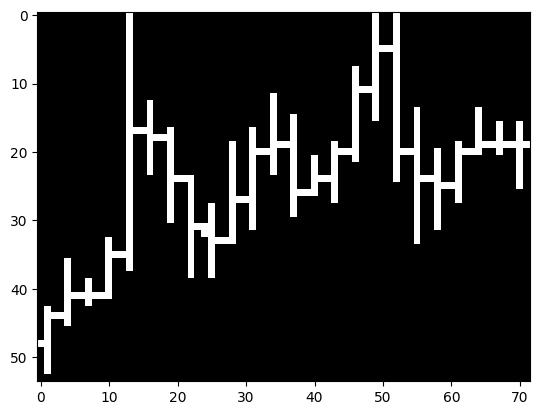

In [185]:
plt.figure()
plt.imshow(image, cmap = "gray")

In [44]:
image_2 = training_data[26215]
image_2.shape

(54, 72)

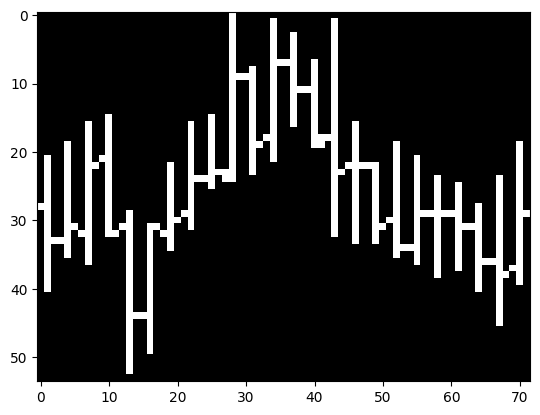

In [45]:
plt.figure()
plt.imshow(image_2, cmap = "gray")

In [286]:
# OUTPUT GENERATION
link_to_csv = "memedata/wifusdt.csv"
link_to_folder = "image_data/wifusdt/"

output = pd.read_csv(link_to_csv)
output = output[["Open time", "LogReturns"]]

# Separate to training_output, validation_output, and testing_output
training_output = output[output["Open time"] < training_benchmark]
validation_output = output[(output["Open time"] < validation_benchmark) & (output["Open time"] >= training_benchmark)]
testing_output = output[output["Open time"] >= validation_benchmark]

# 1 more handling step
training_output = training_output[24:len(training_output) - 1]
validation_output = validation_output[24:len(validation_output) - 1]
testing_output = testing_output[24:len(testing_output) - 1]

# Print out the shape for checking
print(f"Training Output Shape: {training_output.shape}")
print(f"Validation Output Shape: {validation_output.shape}")
print(f"Testing Output Shape: {testing_output.shape}")

# Save to csv file
training_output_path = os.path.join(link_to_folder, "training_output.csv")
training_output.to_csv(training_output_path, index = False)

testing_output_path = os.path.join(link_to_folder, "testing_output.csv")
testing_output.to_csv(testing_output_path, index = False)

validation_output_path = os.path.join(link_to_folder, "validation_output.csv")
validation_output.to_csv(validation_output_path, index = False)

Training Output Shape: (0, 2)
Validation Output Shape: (0, 2)
Testing Output Shape: (5111, 2)


In [249]:
# Test whether training_data.dat can read
training_data = []
training_data.append(np.memmap("image_data/xrpusdt/training_data.dat", dtype = np.uint8, mode = 'r').reshape(
                        (-1, 54, 72)))
training_data = np.concatenate(training_data)
print(training_data.shape)

(26240, 54, 72)


In [250]:
# Test whether validation_data.dat can read
validation_data = [] 
validation_data.append(np.memmap("image_data/xrpusdt/validation_data.dat", dtype = np.uint8, mode = 'r').reshape(
    (-1, 54, 72)
))
validation_data = np.concatenate(validation_data)
print(validation_data.shape)

(2159, 54, 72)


In [287]:
# Test whether testing_data.dat can read
testing_data = [] 
testing_data.append(np.memmap("image_data/wifusdt/testing_data.dat", dtype = np.uint8, mode = 'r').reshape(
    (-1, 54, 72)
))
testing_data = np.concatenate(testing_data)
print(testing_data.shape)

(5111, 54, 72)


In [108]:
# List of cryptocurrencies and folders
cryptos = ["btcusdt", "dogeusdt", "dotusdt", "ethusdt", 
           "lunausdt", "maticusdt", "shibusdt", "solusdt", "xrpusdt"]
folders = ["testing_folder", "validation_folder", "training_folder"]

# Base path for images
base_path = "image"

image_array_path = "image_data"
# Automate the conversion for each cryptocurrency and folder
for crypto in cryptos:
    for folder in folders:
        images_folder = os.path.join(base_path, crypto, folder)
        output_file = os.path.join(image_array_path, crypto, f"{folder.split('_')[0]}_data.dat")
        
        # Check if the folder exists before processing
        if os.path.exists(images_folder):
            print(f"Processing {images_folder} to {output_file}...")
            images_to_dat(images_folder, output_file)
        else:
            print(f"Folder {images_folder} does not exist.")

Processing image/btcusdt/testing_folder to image_data/btcusdt/testing_data.dat...
Processing image/btcusdt/validation_folder to image_data/btcusdt/validation_data.dat...
Processing image/btcusdt/training_folder to image_data/btcusdt/training_data.dat...
Processing image/dogeusdt/testing_folder to image_data/dogeusdt/testing_data.dat...
Processing image/dogeusdt/validation_folder to image_data/dogeusdt/validation_data.dat...
Processing image/dogeusdt/training_folder to image_data/dogeusdt/training_data.dat...
Processing image/dotusdt/testing_folder to image_data/dotusdt/testing_data.dat...
Processing image/dotusdt/validation_folder to image_data/dotusdt/validation_data.dat...
Processing image/dotusdt/training_folder to image_data/dotusdt/training_data.dat...
Processing image/ethusdt/testing_folder to image_data/ethusdt/testing_data.dat...
Processing image/ethusdt/validation_folder to image_data/ethusdt/validation_data.dat...
Processing image/ethusdt/training_folder to image_data/ethusdt